In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mt

In [3]:
def prob_dt(a, b):
    
    S_loc = [[3,4], [7,7], [7,2], [5,2], [3,5], [8,5], [8,3]]
    
#    S_loc = [[3,4], [7,7], [7,2], [4,3], [5,2], [4,6], [8,5], [8,3]]

#    S_loc = [[1,2], [3,5], [7,8], [8,2], [6,3], [5,7], [1,1], [8,5], [9,3], [3,1]]
#    S_loc = [[1,2], [3,5], [7,8], [8,2], [6,3]] # Hardcoding the sensor positions
    sigma = 3 # assigning the delta value (constant)
    dist = [] # Intitializing the list for distance
    x = float(a) #a[0] # Assigning variable for the x coordinate of agent position
    y = float(b) #a[1] # Assigning variable for the y coordinate of agent position

# Following loop iterates through the list of sensor positions and returns the list distances of the agent 
# from the each sensor
    for i in S_loc:
        x1 = i[0]
        y1 = i[1]
        k = (x - x1)**2 + (y - y1)**2
        d = mt.sqrt(k)
        dist.append(d)

    dist.sort() # sorting the list
    d1 = dist[0] # assigning the smallest distance
    d2 = dist[1] # assigning the second smallest distance

    p1 = 1/(1+((d1/sigma)**2)) # Calculating probability of registering with the closest sensor
    p2 = 1/(1+((d2/sigma)**2)) # Calculating probability of registering with the second closest sensor
    px = p1*p2 # total probablity of detection by the two closest sensors

    return(px)

In [4]:
prob_dt(9, 1)

0.4132653061224489

In [5]:
x = y = np.linspace(0, 10, 100) # Generating the coordinates for a 10 X 10 grid

z = []
d= []
for i in x:
    for j in y:
        a = i
        b = j
        pr = prob_dt(a, b) # Generating the probability of detection for all the coordinates in the grid
#        k = [a, b, pr]
        z.append(pr)
#       d.append(k)

In [6]:
z = np.array(z)
Z = z.reshape(100, 100) # Reshaping z to fit to the grid

In [7]:
X, Y = np.meshgrid(x, y)


In [8]:
Z.shape

(100, 100)

In [9]:
s_loc = [[3,4], [7,7], [7,2], [5,2], [3,5], [8,5], [8,3]]

# s_loc = [[3,4], [7,7], [7,2], [4,3], [5,2], [4,6], [8,5], [8,3]]
#s_loc = [[1,2], [3,5], [7,8], [8,2], [6,3], [5,7], [1,1], [8,5], [9,3], [3,1]]
#S_loc = [[1,2], [3,5], [7,8], [8,2], [6,3]]
s_loc

[[3, 4], [7, 7], [7, 2], [5, 2], [3, 5], [8, 5], [8, 3]]

In [10]:
j = []
k = []

for i in s_loc:
    a = i[0]
    b = i[1]
    j.append(a) # assigning the coordinates of the sensors for plotting
    k.append(b) 

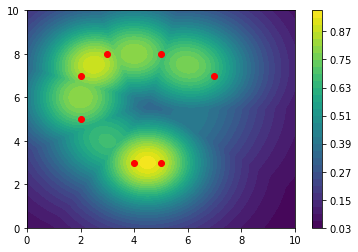

In [11]:
plt.contourf(X, Y, Z, 30)
#plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(k, j, 'ro')

In [111]:
# plt.contourf(X, Y, Z, 30)
# #plt.clabel(contours, inline=True, fontsize=8)
# plt.colorbar()
# plt.plot(j, k, 'ro')

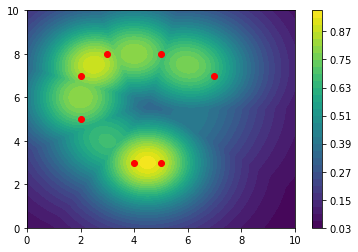

In [12]:
plt.contourf(X, Y, Z, 30)
#plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(k, j, 'ro')

#### Building a path

In [354]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 6, 100)

In [355]:
len(x)

100

In [356]:
len(y)

100

#### Cost Function calculation - 

In [119]:
n = 100 # number of time intervals 
dt = 1/n # delta_t ; size of each time interval

x = np.linspace(0, 5, n+1) # generating the x coordinates for the path
y = np.linspace(0, 6, n+1) # generating the y coordinates for the path

In [120]:
# below part code calculates the speed over the traversed part for the velocity component of the cost function

x_s1 = []
y_s1 = []

for i in range(n): # looping through n time intervals from the start point (0,0) to n leaving behind n+1
    kx = ((x[i+1] - x[i])**2)/(dt**2) # calculating the speed over the x coordinates
    x_s1.append(kx)

x_s2 = sum(x_s1)*dt

for i in range(n): # looping through n time intervals from the start point (0,0) to n leaving behind n+1
    ky = ((y[i+1] - y[i])**2)/(dt**2) # calculating the speed over the y coordinates
    y_s1.append(ky)

y_s2 = sum(y_s1)*dt

xy_speed = x_s2 + y_s2 # final speed over the traversed path

# below part of the code calculates the total probability of detection along the path for the cost function

p_xy = []

for i in range(n):
    a = x[i]
    b = y[i]
    pd = prob_dt(a, b)
    p_xy.append(pd)

p_xy_ttl = (sum(p_xy))*dt

# Below step calculates the total cost as a sum od the speed component and the total probibility of detection along the path

cost = xy_speed + p_xy_ttl
print(cost)

61.64437765778931


In [93]:
x_s2, y_s2, xy_speed, p_xy_ttl

(25.00000000000001, 35.99999999999997, 60.999999999999986, 0.6443776577893301)

#### Packaging the cost function

In [13]:
n = 100 # number of time intervals 
dt = 10/n # delta_t ; size of each time interval

x0 = np.linspace(0, 5, n+1) # generating the x coordinates for the path
y0 = np.linspace(0, 6, n+1) # generating the y coordinates for the path

In [14]:
x0[99], y0[99], x0[100], y0[100]

(4.95, 5.9399999999999995, 5.0, 6.0)

In [15]:
x0[0], y0[0], x0[1], y0[1]

(0.0, 0.0, 0.05, 0.06)

In [16]:
x0[1:100], y0[1:100]

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
        1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
        1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
        2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
        2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
        3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
        3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
        4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
 array([0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 , 0.66,
        0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26, 1.32,
        1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92, 1.98,
        2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58, 2.64,
        2.7 , 2.76, 2.82, 2.88, 2.94

In [17]:
z = np.concatenate((x0[1:100], y0[1:100])) # creating the path barring the start and the end point (0,0) and (5,6)

In [18]:
len(z), int(len(z)/2 - 2)

(198, 97)

In [19]:
z[0], z[98], z[99], z[197]

(0.05, 4.95, 0.06, 5.9399999999999995)

In [20]:
z[0:99], z[99:198]

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
        1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
        1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
        2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
        2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
        3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
        3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
        4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
 array([0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 , 0.66,
        0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26, 1.32,
        1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92, 1.98,
        2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58, 2.64,
        2.7 , 2.76, 2.82, 2.88, 2.94

In [21]:
x7 = z[0:99]
y7 = z[99:198]
x7[98],y7[98]

(4.95, 5.9399999999999995)

## Cost function with the kinetic and probability component

In [22]:
def cost(z):

# fixing the start and the fix point
    x_start = 0.0
    y_start = 0.0
    x_finish = 5.0
    y_finish = 6.0
# below part code calculates the speed over the traversed part for the velocity component of the cost function

    x = z[0:99]
    y = z[99:198]
#    nn = int(len(z)/2 - 2)

    x_s1 = []
    y_s1 = []

    for i in range(len(x) - 1): # looping through n time intervals from the start point (0,0) to n leaving behind n+1
        kx = ((x[i+1] - x[i])**2)/(dt**2) # calculating the speed over the x coordinates
        x_s1.append(kx)

    x_s2 = sum(x_s1)*dt

    for i in range(len(y) - 1): # looping through n time intervals from the start point (0,0) to n leaving behind n+1
        ky = ((y[i+1] - y[i])**2)/(dt**2) # calculating the speed over the y coordinates
        y_s1.append(ky)

    y_s2 = sum(y_s1)*dt

    # Calculating the speed component for the start and the finish points - 
    
    # start point
    
    x_s3 = ((x[0] - x_start)**2)/(dt)
    y_s3 = ((y[0] - y_start)**2)/(dt)
    xy_st = x_s3 + y_s3
    
    # finish point
    
    x_s4 = ((x_finish - x[98])**2)/(dt)
    y_s4 = ((y_finish - y[98])**2)/(dt)
    xy_fn = x_s4 + y_s4
    
    # Total final speed cost 
    
    xy_speed = 0.01*(x_s2 + y_s2 + xy_st + xy_fn) # final speed over the traversed path including start and end points
    

# below part of the code calculates the total probability of detection along the path for the cost function

    p_xy = []

    for i in range(len(x)):
        a = x[i]
        b = y[i]
        pd = prob_dt(a, b)
        p_xy.append(pd)

#    p_xy_ttl = (sum(p_xy))*dt
    
    # Probablity of detection at start and end points 
    
    pd_st = prob_dt(x_start, y_start)
    pd_fn = prob_dt(x_finish, y_finish)
    
    # total probability of detection -

    p_xy_ttl = (sum(p_xy) + pd_st + pd_fn)*dt
    

# Below step calculates the total cost as a sum od the speed component and the total probibility of detection along the path

    cost = xy_speed + p_xy_ttl
    return(cost)

In [29]:
cost(z)

4.7675560489604285

## Cost function with probability component only

In [26]:
def cost_prob(z):

# fixing the start and the fix point
    x_start = 0.0
    y_start = 0.0
    x_finish = 5.0
    y_finish = 6.0

    x = z[0:99]
    y = z[99:198]

# below part of the code calculates the total probability of detection along the path for the cost function

    p_xy = []

    for i in range(len(x)):
        a = x[i]
        b = y[i]
        pd = prob_dt(a, b)
        p_xy.append(pd)

#    p_xy_ttl = (sum(p_xy))*dt
    
    # Probablity of detection at start and end points 
    
    pd_st = prob_dt(x_start, y_start)
    pd_fn = prob_dt(x_finish, y_finish)
    
    # total probability of detection -

    p_xy_ttl = (sum(p_xy) + pd_st + pd_fn)*dt
    cost = p_xy_ttl
    return(cost)

In [28]:
cost_prob(z)

4.706556048960429

#### Minimizing the cost( )

In [24]:
from scipy.optimize import minimize

In [31]:
res = minimize(cost, z, method='Nelder-Mead', tol=1e-6)
res.x

array([0.05507818, 0.15993288, 0.29425449, 0.35150512, 0.51043534,
       0.39805259, 0.46427761, 0.59366586, 0.65115901, 0.72274163,
       0.75251729, 0.80096114, 0.77143916, 0.84102501, 0.91785896,
       0.94398348, 1.0013919 , 1.0502481 , 1.18688801, 1.17680391,
       1.11689806, 1.12573855, 1.18482274, 1.20386665, 1.19583842,
       1.18610461, 1.21657675, 1.24117552, 1.27356555, 1.299988  ,
       1.3218895 , 1.32702315, 1.3068979 , 1.26482913, 1.17237642,
       1.16369426, 1.19879651, 1.28159377, 1.30809882, 1.43267004,
       1.53186431, 1.60628958, 1.7113462 , 1.7228717 , 1.74849386,
       1.74297923, 1.72041425, 1.71923177, 1.77566105, 1.83313966,
       1.90971612, 1.97244493, 2.0358045 , 2.04109748, 2.07328769,
       2.09312383, 2.13976939, 2.19569555, 2.32738697, 2.48499984,
       2.64776492, 2.79422859, 2.97780715, 3.20675174, 3.5310836 ,
       3.90554986, 4.35382628, 4.68805919, 4.99817951, 5.28134639,
       5.49420234, 5.56549661, 5.62506009, 5.68362691, 5.68966

In [32]:
p = (res.x) # assigning the output of minimization to a variable

In [33]:
p[0:99], p[99:198]

(array([0.05507818, 0.15993288, 0.29425449, 0.35150512, 0.51043534,
        0.39805259, 0.46427761, 0.59366586, 0.65115901, 0.72274163,
        0.75251729, 0.80096114, 0.77143916, 0.84102501, 0.91785896,
        0.94398348, 1.0013919 , 1.0502481 , 1.18688801, 1.17680391,
        1.11689806, 1.12573855, 1.18482274, 1.20386665, 1.19583842,
        1.18610461, 1.21657675, 1.24117552, 1.27356555, 1.299988  ,
        1.3218895 , 1.32702315, 1.3068979 , 1.26482913, 1.17237642,
        1.16369426, 1.19879651, 1.28159377, 1.30809882, 1.43267004,
        1.53186431, 1.60628958, 1.7113462 , 1.7228717 , 1.74849386,
        1.74297923, 1.72041425, 1.71923177, 1.77566105, 1.83313966,
        1.90971612, 1.97244493, 2.0358045 , 2.04109748, 2.07328769,
        2.09312383, 2.13976939, 2.19569555, 2.32738697, 2.48499984,
        2.64776492, 2.79422859, 2.97780715, 3.20675174, 3.5310836 ,
        3.90554986, 4.35382628, 4.68805919, 4.99817951, 5.28134639,
        5.49420234, 5.56549661, 5.62506009, 5.68

In [38]:
z[0:99], z[99:198]

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
        1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
        1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
        2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
        2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
        3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
        3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
        4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
 array([0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 , 0.66,
        0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26, 1.32,
        1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92, 1.98,
        2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58, 2.64,
        2.7 , 2.76, 2.82, 2.88, 2.94

In [35]:
cost(p), len(p)

(3.1237721630994284, 198)

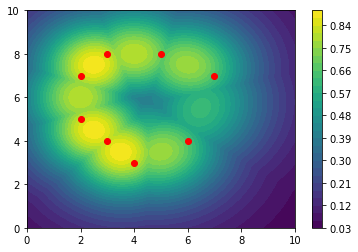

In [441]:
plt.contourf(X, Y, Z, 30)
#plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(k, j, 'ro')

In [36]:
x1 = p[0:99]
y1 = p[99:198]

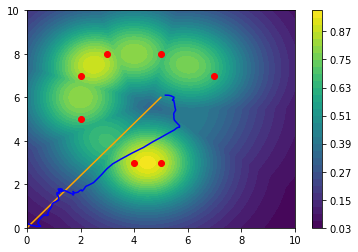

In [37]:
plt.contourf(X, Y, Z, 30)
#plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(k, j, 'ro')
plt.plot(x0, y0, 'orange')
plt.plot(x1, y1, 'blue')

#### Minimizing the cost_prob( )

In [39]:
res = minimize(cost_prob, z, method='Nelder-Mead', tol=1e-6)
res.x

array([-2.08821180e-01, -6.54216866e-01,  5.87225345e-01,  1.38311002e+00,
        1.88044723e+00,  1.73934256e-01, -5.34595297e-01,  2.16967211e+00,
        1.12556166e+00, -1.50725114e+00,  5.57562828e-01, -4.92968683e+00,
       -1.57319355e+00, -2.47740309e+00, -3.33796743e+00, -1.08676145e+01,
       -5.06549180e+00, -1.05344361e+01, -5.11827524e+00, -1.16341380e+01,
       -1.05873945e+01, -5.21252701e+00, -1.59165914e+00, -2.44010756e+00,
       -4.73277114e+00, -3.72345066e-01, -9.61614290e-02, -2.36372924e+01,
       -1.40288745e+01, -1.45382020e+01,  9.04077248e+00, -2.79937158e+01,
       -6.11167124e-01, -9.73051945e+00, -2.78898345e+01, -5.29126849e+00,
       -1.58809469e+01, -3.68773589e+00,  2.93570625e+00,  2.52225596e+01,
        1.97600994e+01,  1.32501155e+01,  1.43826082e+01,  1.85717745e+01,
        2.63517922e+01, -3.39495418e+00, -2.47087251e+00,  1.08591983e+01,
        2.75825894e+01, -2.98578821e+00,  3.38341861e+00,  4.21474057e-01,
       -5.92264931e+01, -

In [40]:
p2 = (res.x) # assigning the output of minimization to a variable

In [41]:
cost_prob(p2), len(p2)

(0.21391740377068005, 198)

In [42]:
x2 = p2[0:99]
y2 = p2[99:198]

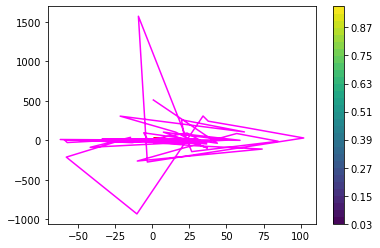

In [43]:
plt.contourf(X, Y, Z, 30)
#plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(k, j, 'ro')
plt.plot(x0, y0, 'orange')
plt.plot(x1, y1, 'blue')
plt.plot(x2, y2, 'magenta')